<a href="https://colab.research.google.com/github/Likhithakarri/FMML-Module-5-Project/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

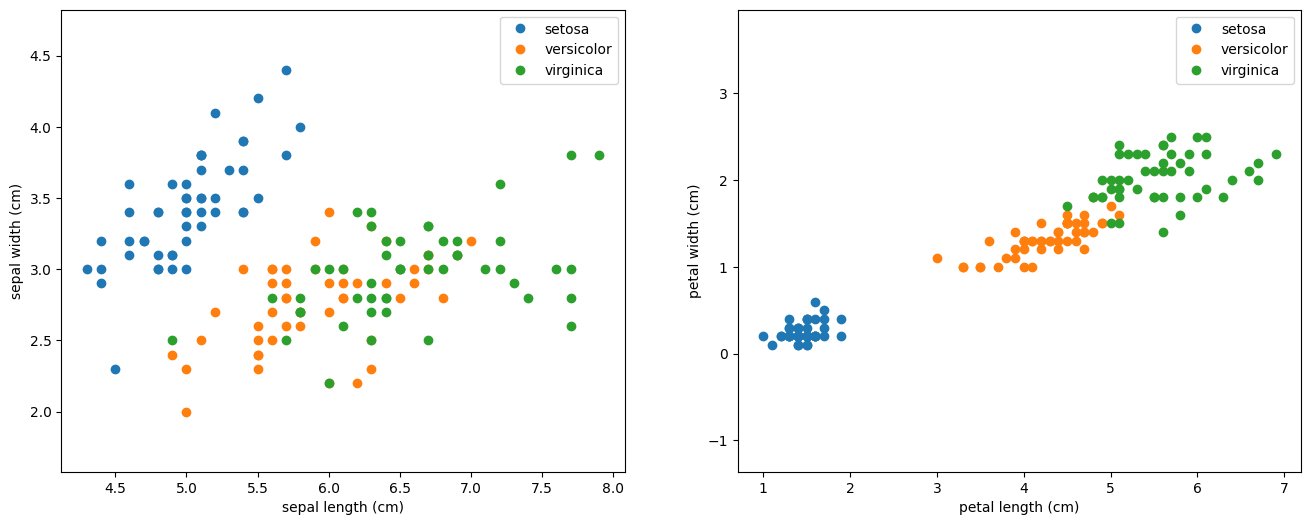

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 283.76it/s]


# Plot training progress

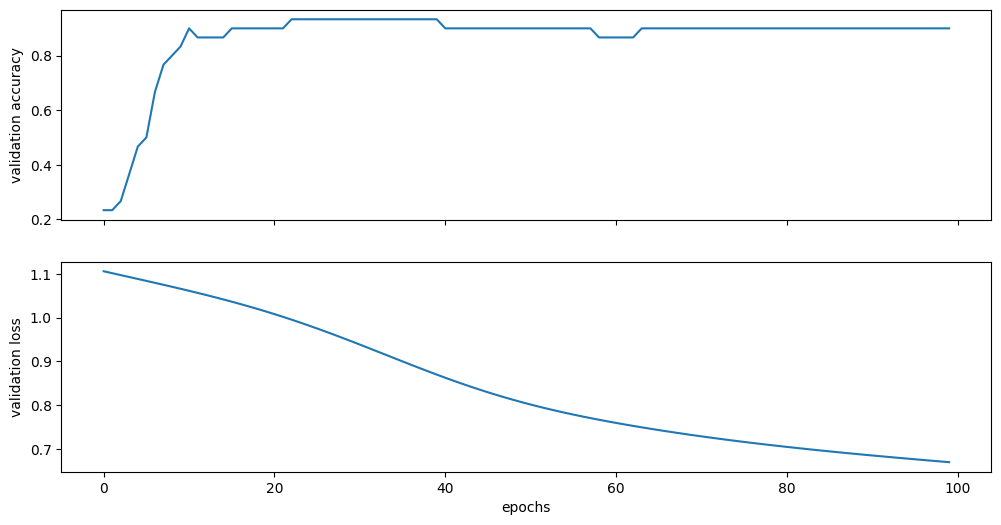

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
c



Can you observe any changes?

**Answer1**
Effect on Model Complexity: Adding more hidden layers increases the model's capacity to learn complex patterns in the data. Each hidden layer can capture different levels of abstraction in the input data, allowing the network to represent more intricate relationships between features. Conversely, reducing the number of hidden layers simplifies the model, potentially limiting its ability to learn complex patterns.
Impact on Training Time: Generally, deeper networks with more hidden layers may require more time to train compared to shallower networks. This is because deeper networks have more parameters that need to be learned during the training process. However, advancements in optimization algorithms and hardware acceleration techniques have mitigated this issue to some extent.
Risk of Overfitting: Increasing the number of hidden layers can increase the risk of overfitting, especially if the network becomes too complex relative to the size of the training dataset. Overfitting occurs when the model learns to memorize the training data instead of capturing underlying patterns, leading to poor generalization performance on unseen data. Regularization techniques such as dropout and weight decay can help mitigate overfitting in deep networks.
Vanishing or Exploding Gradients: Deeper networks are more susceptible to vanishing or exploding gradient problems during training. Vanishing gradients occur when gradients become extremely small as they propagate backward through deep layers, making it challenging for early layers to learn effectively. Conversely, exploding gradients occur when gradients become excessively large, leading to unstable training. Techniques such as careful weight initialization, batch normalization, and gradient clipping can help alleviate these issues.
Feature Representation: Each hidden layer in a neural network learns increasingly abstract representations of the input data. Deeper layers tend to capture higher-level features or concepts, while shallower layers capture lower-level features. Adjusting the number of hidden layers allows you to control the depth of abstraction in the learned representations, potentially improving the model's ability to extract relevant features for the task at hand.


***Answer2***
Model Capacity: Adjusting the number of neurons in the hidden layer directly affects the model's capacity to learn and represent complex patterns in the data. Increasing the number of neurons allows the model to capture more intricate relationships between input features, potentially improving its ability to fit the training data. Conversely, reducing the number of neurons decreases the model's capacity, limiting its ability to learn complex patterns.
Generalization vs. Overfitting: Adding more neurons to the hidden layer can increase the risk of overfitting, where the model learns to memorize noise or outliers in the training data rather than generalizing well to unseen data. This is particularly true if the number of neurons is significantly larger than necessary for the given task or dataset. Regularization techniques such as dropout, L1/L2 regularization, or early stopping can help mitigate overfitting when increasing the number of neurons.
Training Time and Computational Cost: Increasing the number of neurons in the hidden layer typically increases the computational cost of training the neural network. This is because the model has more parameters to learn, leading to longer training times, especially for large datasets or deep architectures. Conversely, reducing the number of neurons can decrease training time and computational cost.
Gradient Descent Stability: The number of neurons in the hidden layer can affect the stability of gradient descent during training. In deep networks, particularly with large numbers of neurons, issues such as vanishing or exploding gradients may arise. Vanishing gradients occur when gradients become very small, leading to slow learning or convergence, while exploding gradients occur when gradients become very large, causing instability during training. Techniques such as careful weight initialization, batch normalization, or gradient clipping can help address these issues.
Feature Representation: The number of neurons in the hidden layer influences the complexity and richness of the feature representations learned by the neural network. More neurons allow for a more expressive representation of the input data, potentially capturing finer details and nuances in the underlying patterns. However, too many neurons may lead to overfitting, as mentioned earlier.


**Answer3**
Model Capacity: The tanh activation function squashes the output to the range [-1, 1], allowing the model to learn more complex patterns compared to a binary thresholding function like ReLU. Tanh can capture both positive and negative values, potentially enhancing the model's capacity to represent more intricate relationships in the data.
Generalization vs. Overfitting: Tanh may help mitigate overfitting compared to ReLU because it maps inputs to a bounded output range, preventing extreme values that can lead to overfitting. However, the risk of overfitting still exists, especially if the model architecture is overly complex or if the dataset is small. Regularization techniques like dropout or weight decay can still be beneficial.
Training Time and Computational Cost: The computational cost of using tanh is generally higher than ReLU due to the additional mathematical operations involved in computing the tanh function. However, the difference in training time and computational cost may not be substantial in practice, especially for moderate-sized networks.
Gradient Descent Stability: Tanh tends to suffer less from vanishing gradients compared to sigmoid activation functions, especially in the middle of its range where the gradient is steeper. However, tanh still exhibits vanishing gradients for extreme input values, particularly in deeper networks. Careful weight initialization and gradient normalization techniques can help mitigate this issue.
Feature Representation: Tanh produces output values in the range [-1, 1], which may lead to more balanced representations compared to ReLU, which produces output values in the range [0, ∞). This balanced representation can be beneficial for tasks where negative and positive values are equally informative, such as sentiment analysis or audio processing.